Data Point # 1 :  -112.94559466952 ,  -45.817660450773 ,  1758115097.0
Data Point # 2 :  -111.92793889939 ,  -46.198077105575 ,  1758115110.0
Data Point # 3 :  -111.05539390334 ,  -46.512009656404 ,  1758115121.0
Data Point # 4 :  -110.17235725084 ,  -46.818475747762 ,  1758115132.0
Data Point # 5 :  -109.2788622089 ,  -47.117309268203 ,  1758115143.0
Data Point # 6 :  -108.37494568239 ,  -47.408348139878 ,  1758115154.0
Data Point # 7 :  -106.87350816069 ,  -47.867346944404 ,  1758115172.0
Data Point # 8 :  -105.94246508194 ,  -48.13704610303 ,  1758115183.0
Data Point # 9 :  -105.0013177073 ,  -48.398352563255 ,  1758115194.0
Data Point # 10 :  -104.05018960914 ,  -48.65110610774 ,  1758115205.0
Data Point # 11 :  -103.0892388516 ,  -48.895144185732 ,  1758115216.0
Data Point # 12 :  -102.1186307046 ,  -49.130309685364 ,  1758115227.0
Data Point # 13 :  -101.228048053 ,  -49.336263799131 ,  1758115237.0
Data Point # 14 :  -100.23956691763 ,  -49.554056090088 ,  1758115248.0
Data Poin

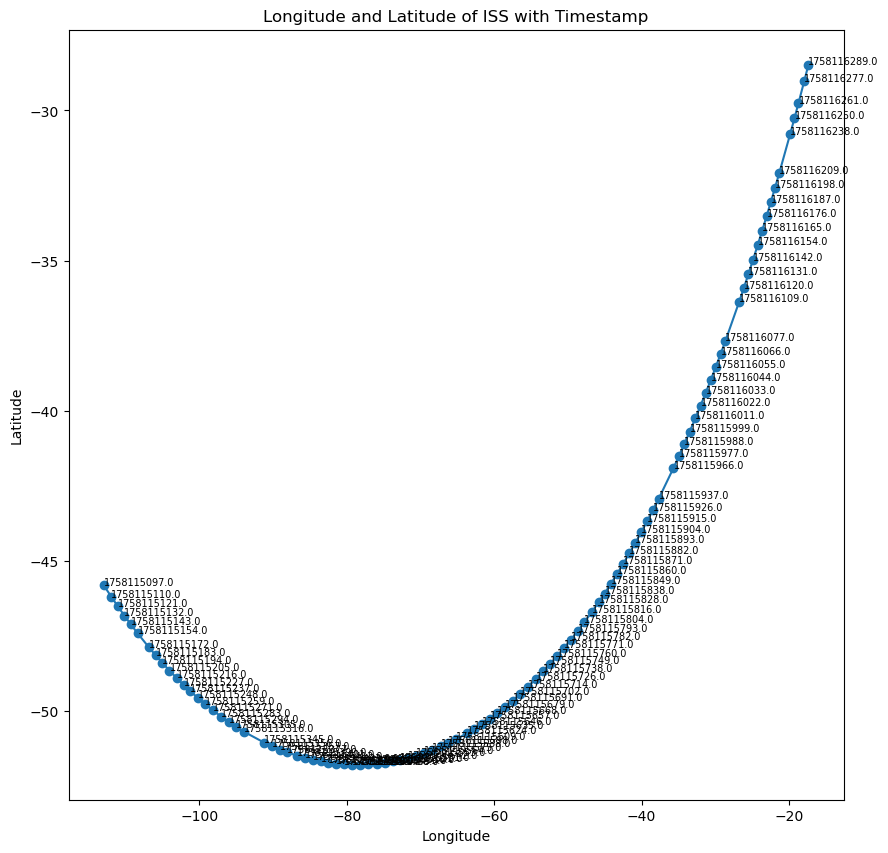

In [35]:
# Import necessary libraries.
import requests
import time
import asyncio
import matplotlib
import matplotlib.pyplot as plt

# Number of data points required and data obtained it set.
number_of_collections = 100
latitude = []
longitude = []
timestamp = []

# Loop repeats until 100 data points have been collected.
for point in range(number_of_collections):
    # URL to the API is opened.
    try:
        response = requests.get('https://api.wheretheiss.at/v1/satellites/25544', timeout=1500)

    # Request is repeated in the event of a timeout.
    except requests.Timeout as error:
        print(error)   
        response = requests.get('https://api.wheretheiss.at/v1/satellites/25544', timeout=1500)

    # Data is converted into string
    data_line = response.text

    # String is cleaned up, removing any brackets.
    data_cleaned = data_line.replace("[", "").replace("]", "").replace("{", "").replace("}", "")

    # String is converted into a dictionary with entries split by the colons and commas.
    my_dict = {value.split(":")[0]: value.split(":")[1] for value in data_cleaned.split(",")}

    # Latitude data is appended to the list
    latitude.append(float(my_dict['"latitude"'].replace("'", "")))
    point_latitude = (float(my_dict['"latitude"'].replace("'", "")))

    # Longitude data is appended to the list
    longitude.append(float(my_dict['"longitude"'].replace("'", "")))
    point_longitude = (float(my_dict['"longitude"'].replace("'", "")))

    # Timestamp data is appended to the list
    timestamp.append(float(my_dict['"timestamp"'].replace("'", "")))
    point_timestamp = (float(my_dict['"timestamp"'].replace("'", "")))

    # Each data point is printed to keep track of progress.
    print('Data Point #', (point+1), ': ', point_longitude, ', ', point_latitude, ', ', point_timestamp)

    # Program waits 10 seconds before restarting the loop.
    time.sleep(10)

# Program plots out all of the data. Longitude is in the x axis and latitude is at the y axis.
plt.figure(figsize=(10,10))
plt.plot(longitude, latitude, marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude and Latitude of ISS with Timestamp')

# Each data point is labeled with their respective timestamp.
for x, y, name in zip(longitude, latitude, timestamp):
    plt.text(x, y, name, fontsize=7)

# Graph is presented.
plt.show()